Those are outputs from ChatGPT when I asked it to 'optimize', 'simplify' and 're-write code in standard style'.

# 'Optimized' code

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.collections
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values,
                width=10, 
                height=10, 
                cmap=plt.cm.viridis,
                c=None,
                bc = 'w',
                autoscale=True,
                over_represent = False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign = '',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):

    # Transposing into dataframe-like format and sorting by value, descending
    categories, values = zip(*sorted(zip(categories, values), key=lambda x: x[1], reverse=True))

    # Getting number of categories
    n_categories = len(categories)

    cmap = cmap.resampled(len(categories))
    
    c = cmap.colors if c is None else c
        
    # Legend control
    legend_labels = [f"{cat}{value_sign}{val}" for cat, val in zip(categories, values)]
    legend_labels = "\n".join(f"{label}{' (' + str(int(val/sum(values)*100)) + '%)' if label_p else ''}" for label in legend_labels)

    if autoscale:
        # Calculating autoscale factor
        autoscale_factor = 1/max(values)
        if over_represent:
            autoscale_factor = max(autoscale_factor, 1/max([x if x>=0.5 else 0.5 for x in [val/sum(values) for val in values]]))
    else:
        autoscale_factor = 1

    fig, ax = plt.subplots(figsize=figsize)

    # Creating waffle chart
    for i, (cat, val) in enumerate(zip(categories, values)):
        patches = [mpatches.Rectangle((x, y), 1, 1, facecolor=c[i]) for x in range(width) for y in range(height) if (x + y*width) < round(val*autoscale_factor)]
        pc = matplotlib.collections.PatchCollection(patches, match_original=True)
        ax.add_collection(pc)

    # Removing x and y axis
    ax.axis('off')

    # Removing plot frame
    ax.set_frame_on(False)

    # Setting plot background color
    if bc == 'w':
        ax.set_facecolor('w')
    else:
        ax.set_facecolor(bc)

    # Plotting legend
    legend = ax.legend(categories, bbox_to_anchor=legend_loc, ncol=legend_ncols, prop={'size':12, 'family':font})
    
    legend_labels = [f"{cat}{value_sign}{val}" for cat, val in zip(categories, values)]
    legend_labels = "\n".join(f"{label}{' (' + str(int(val/sum(values)*100)) + '%)' if label_p else ''}" for label in legend_labels)

    # Creating legend
    ax.legend(legend_labels, bbox_to_anchor=legend_loc, ncol=legend_ncols, prop={'size':12, 'family':font})

    # Adding title
    plt.title('Waffle Chart', fontsize=20, y=1.05, fontname=font)

    # If save is not None, save the plot to specified location and return None
    if save is not None:
        plt.savefig(save, dpi=100, bbox_inches='tight', pad_inches=0.1)
        plt.clf()
        return None

    # Displaying plot
    plt.show()

In [2]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

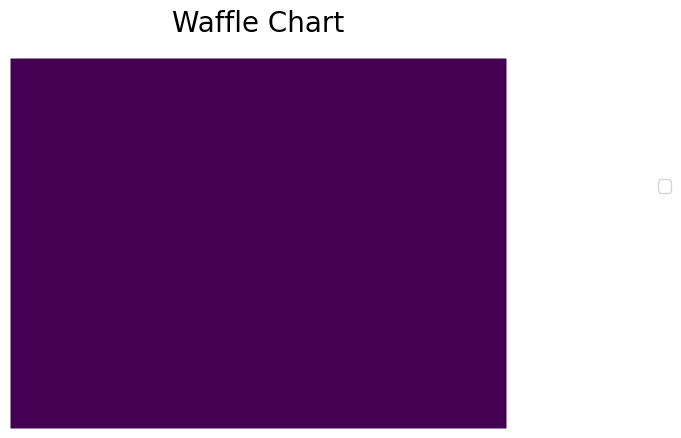

In [3]:
waffle_plot(df['categories'], df['values'])

# 'Simplified' code 

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def waffle_plot(categories, values,
                width=10, 
                height=10, 
                cmap=None,
                c=None,
                bc = 'w',
                autoscale=True,
                over_represent = False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign = '',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):
    
    # stacking arrays into one matrix
    a = [categories, values]

    # Transposing into dataframe-like format
    a = list(map(list, zip(*a)))

    # Sorting the array by value, descending
    a = sorted(a, key=lambda x: x[1], reverse=True)

    # Getting sorted categories and values
    categories = [row[0] for row in a]
    values = [row[1] for row in a]

    # Getting number of categories
    n_categories = len(categories)
    
    # Generate colors using colormap
    if cmap is not None:
        cmap = cmap.resample(len(categories))
        c = [cmap(i) for i in range(len(categories))]
    
    # If the list of colors is shorter than the list of categories...
    if c is not None and len(c) < len(categories):
        # Extend the list of colors with the default colors
        default_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        c.extend(default_colors[:len(categories) - len(c)])
    
    # If no colors are provided, use default colors
    if c is None:
        c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    
    # Cutting colour list in case we have more colours than categories
    c = c[:n_categories]

    proportions_cmap = [(value / sum(values)) for value in values if value > 0]

    # autoscaling

    if autoscale:

        # condition variable for 'while' loop
        condition=False

        while condition is not True:

            total = width * height
            patches = sum(proportions_cmap) * total

            if patches < total:
                proportions_cmap.append((1 - patches / total))
                condition = False
            elif patches == total:
                condition = True
            else:
                condition = True
                width -= 1
                height -= 1

    # creating lists for patches 
    x_patches = []
    y_patches = []
    widths = []
    heights = []

    # loop to create patches, to be used as rectangles in barplot
    for category, proportion in zip(categories, proportions_cmap):

        widths.append(proportion * width)
        heights.append(height)
        x_patches.append(0)
        y_patches.append(0)

        # changing starting point
        if vertical:
            y_patches[-1] = sum(y_patches)
        else:
            x_patches[-1] = sum(x_patches)

    # creating subplots
    fig, ax = plt.subplots(figsize=figsize)

    # creating patches
    for x, y, width, height, color in zip(x_patches, y_patches, widths, heights, c):
        ax.add_patch(mpatches.Rectangle((x, y), width, height, color=color, ec=bc, lw=0.5))

    # removing top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # hiding ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # setting limits
    if vertical:
        ax.set_ylim(0, sum(y_patches))
    else:
        ax.set_xlim(0, sum(x_patches))

    # hiding tick labels
    plt.tick_params(axis='both', which='both', length=0)

    # empty plot for legend
    ax.plot([], [], ' ', c='w', label=' ')

    # legend
    if label_v and label_p:
        legend_labels = [f'{category}: {value}{value_sign} ({round(value / sum(values) * 100, 2)}%)' for category, value in zip(categories, values)]


    elif label_v:
        legend_labels = [f'{category}: {value}{value_sign}' for category, value in zip(categories, values)]
    elif label_p:
        legend_labels = [f'{category} ({round(value / sum(values) * 100, 2)}%)' for category, value in zip(categories, values)]
    else:
        legend_labels = categories

    ax.legend(c, legend_labels, loc=legend_loc, ncol=legend_ncols, fontsize=10, fontname=font, edgecolor=bc)

    # saving or showing plot
    if save is None:
        plt.show()
    else:
        plt.savefig(save, bbox_inches='tight', facecolor=fig.get_facecolor())

In [5]:
import pandas as pd

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

C:\Users\janni\AppData\Local\Temp\ipykernel_14876\2794462428.py:121: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, sum(y_patches))


TypeError: Legend.__init__() got an unexpected keyword argument 'fontname'

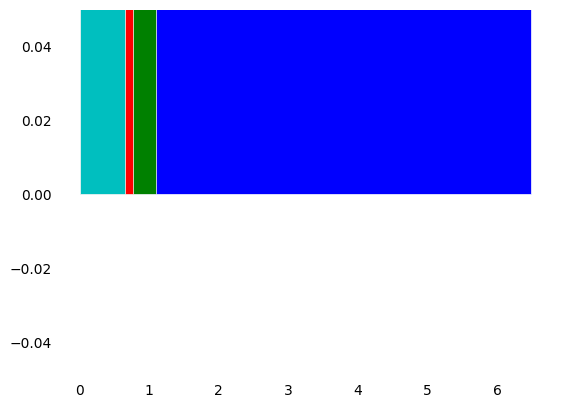

In [6]:
waffle_plot(df['categories'], df['values'])

# Standard style code

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

def waffle_plot(categories, values,
                width=10, 
                height=10, 
                cmap=plt.cm.viridis,
                c=None,
                bc='w',
                autoscale=True,
                over_represent=False,
                vertical=True,
                label_v=True, 
                label_p=False,
                legend_ncols=1, 
                legend_loc=(1.35, 0.695),
                figsize=(6.4, 4.8),
                value_sign='',
                font='DejaVu Sans',
                font_c='black',
                save=None,
                ):

    # Getting sorted categories and values
    categories, values = zip(*sorted(zip(categories, values), key=lambda x: x[1], reverse=True))
    
    # Getting number of categories
    n_categories = len(categories)

    cmap = cmap.resampled(len(categories))
    
    if c is None:
        c = [cmap(x) for x in range(len(categories))]
    else:
        # If there are fewer colors than categories...
        if len(c) < len(categories):
            # Extend list c with appropriate number of colors from colormap
            c.extend([cmap(x) for x in range(len(categories))][len(c):])
        
        if len(c) > len(categories):
            # Cutting colour list in case we have more colours than categories
            c = c[:n_categories]

    proportions_cmap = [(float(value) / sum(values)) for value in values if value > 0]

    # autoscaling
    if autoscale:
        # condition variable for 'while' loop
        condition = False

        while condition is not True:
            total = width * height

            tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]
            # Make a dummy matrix for use in plotting.
            waffle = [[0 for col in range(width)] for row in range(height)]

            # Popoulate the dummy matrix with integer values.
            category_index = 0
            tile_index = 0

            if vertical:
                # Iterate over each tile.
                for col in range(width):
                    for row in range(height):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):
                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index

            if vertical is False:  
                # Iterate over each tile.
                for row in range(height):
                    for col in range(width):
                        tile_index += 1

                        # If the number of tiles populated is sufficient for this category...
                        if tile_index > sum(tiles_per_category[0:category_index]):
                            # ...increment to the next category.
                            category_index += 1

                        # Set the category value to an integer, which increases with category.
                        waffle[row][col] = category_index

            if len(set([item for sublist in waffle for item in sublist])) < len(proportions_cmap):
                condition = False
                width += 1
                height += 1

            else:
                condition = True

    else:
        # if autoscale is off:

        total = width * height

        tiles_per_category = [round(proportion * total) for proportion in proportions_cmap]

        # Make a dummy matrix for use in plotting.
        waffle = [[0 for col in range(width)] for row in range(height)]

        # Popoulate the dummy matrix with integer values.
        category_index = 0
        tile_index = 0

        if vertical:
            # Iterate over each tile.
            for col in range(width):
                for row in range(height):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):
                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index

        if vertical is False:  
            # Iterate over each tile.
            for row in range(height):
                for col in range(width):
                    tile_index += 1

                    # If the number of tiles populated is sufficient for this category...
                    if tile_index > sum(tiles_per_category[0:category_index]):
                        # ...increment to the next category.
                        category_index += 1

                    # Set the category value to an integer, which increases with category.
                    waffle[row][col] = category_index

    # Create a figure and a set of subplots.
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a dictionary mapping integer values to their corresponding categories.
    category_dict = {index+1: category for index, category in enumerate(categories)}
    
    # Create a dictionary mapping integer values to their corresponding colours.
    color_dict = {index+1: color for index, color in enumerate(c)}
    
    # Create a new categorical colormap from the colour dictionary.
    cmap = LinearSegmentedColormap.from_list('waffle_cmap', c)
    
    # Draw the waffle plot.
    for col in range(width):
        for row in range(height):
            # Get the category for this tile.
            category = waffle[row][col]
            # Get the colour for this category.
            color = color_dict[category]
            # Draw a tile with this colour at this position in the waffle plot.
            ax.add_patch(mpatches.Rectangle((col, row), 1, 1, facecolor=color, edgecolor='none'))
    
    # Get the limits for the x and y axes.
    x_min, x_max, y_min, y_max = plt.axis()
    
    # Set the limits for the x and y axes.
    plt.axis((x_min, x_max, y_min, y_max))
    
    # Remove the ticks from the x and y axes.
    plt.xticks([])
    plt.yticks([])
    
    # Set the x and y axis labels.
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Category', fontsize=12)
    
    # Set the title.
    ax.set_title('Waffle Plot', fontsize=14, fontweight='bold')
    
    # Add a legend.
    handles = []
    for color, category in color_dict.items():
        category_label = category_dict[color]
        if value_sign == '%':
            legend_label = '{} ({:.1f}{})'.format(category_label, values[color-1], value_sign)
        elif label_p is True:
            legend_label = '{} ({:.1f}%)'.format(category_label, (values[color-1]/sum(values))*100)
        elif label_v is True:
            legend_label = '{} ({}{})'.format(category_label, value_sign, values[color-1])
        else:
            legend_label = '{}'.format(category_label)
        # Create a patch for this category.
        patch = mpatches.Patch(color=color, label=legend_label)
        handles.append(patch)
    
    # Set the legend location.
    plt.legend(handles=handles, ncol=legend_ncols, loc=legend_loc, fontsize=12, fontname=font, facecolor='none', edgecolor='none')
    
    # If a save path is provided, save the plot to that location.
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    # If no save path is provided, show the plot.
    else:
        plt.show()


ValueError: Invalid RGBA argument: 1

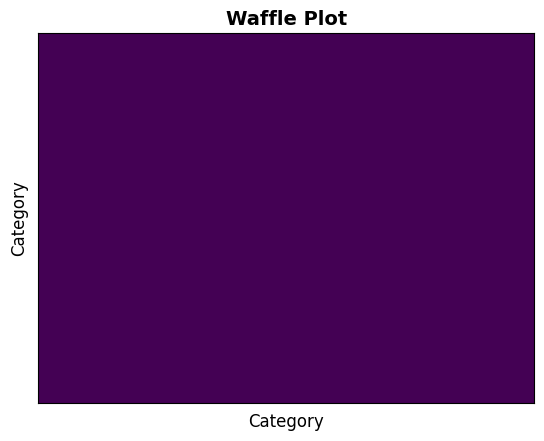

In [8]:
waffle_plot(df['categories'], df['values'])